In [ ]:
import random
import math
from matplotlib import pyplot as plt
import datetime

In [ ]:
L = 20 #League size
L_half = L/2
L_r = int(0.15 * L) #Number of teams to be relegated each season
S = 50 #Number of seasons
n = 10  #Number of dimensions
p_c = 0.3 #Control parameter
PSI1 = 0.2 #Scale coefficient (strength)
PSI2 = 1.0 #Scale coefficient (weakness)
schedule = list()

In [ ]:
class LeagueChampionshipAlgorithm(object):


    def __init__(self):
        return


    def league(self, choice, rel):
        global L
        X = self.getRandomTeam() #X denotes list of teams
        fX = list(0 for step in range(L)) #fX denotes list of fitness values of teams
        fX = self.optimizationFunction(choice, X, fX) #Calculating fitness of teams
        nextX = list(X) #Temporary variable
        B = list(X) #B denotes list of best solutions of each team
        fB = list(fX) #fB denotes fitness values of best solutions of each team
        f_best = min(fB) #f_best denotes the best fitness value among best solutions of teams
        f_bList = list() #f_bList denotes iteration-wise list of f_best values
        f_bList.append(f_best)

        t = 1
        schedule = self.leagueSchedule(t)
        while t <= S * (L - 1):
            Y = self.get_Y()
            for l in range(L):
                teamA, teamB, teamC, teamD = self.teamClassification(X, t, l - 1)
                winner1 = self.winORlose(X, teamA, teamB, fX, f_best)
                winner2 = self.winORlose(X, teamC, teamD, fX, f_best)
                nextX[X.index(teamA)] = self.setTeamFormation(X, B, Y, teamA, teamB, teamC, teamD, winner1, winner2)

            X = nextX.copy()
            fX = self.optimizationFunction(choice, X, fX)
            for l in range(L):
                if fX[l] < fB[l]:
                    B[l] = X[l]
                    fB[l] = fX[l]
            f_best = min(fB)
            f_bList.append(f_best)

            if t % (L - 1) == 0: #End of season
                if rel == 1:
                    self.relegation(X, fX, fB) #Relegation
                schedule = self.leagueSchedule(t)
            t += 1

        self.opfun(fB, f_best)
        return f_bList


    def getRandomTeam(self):
        X = [[round(random.uniform(-10.0, 10.0), 6) for i in range(n)] for l in range(L)]  #Round off to 6 digits
        return X


    def optimizationFunction(self, choice, X, fX):
        if choice is 0:
            #Sphere
            for l in range(L):
                fX[l] = 0
                for i in range(n):
                    fX[l] += X[l][i]**2
            return fX

        elif choice is 1:
            #Rosenbrock
            for l in range(L):
                fX[l] = 0
                for i in range(n - 1):
                    fX[l] += (100 * (X[l][i + 1] - X[l][i])**2 + (1 - X[l][i])**2)
            return fX

        elif choice is 2:
            #Rastrigin
            for l in range(L):
                fX[l] = 0
                for i in range(n):
                  fX[l] += (X[l][i]**2 - 10*math.cos(2*math.pi*X[l][i]) + 10)
            return fX

        elif choice is 3:
            #Ackley
            for l in range(L):
                s1 = 0
                s2 = 0
                for i in range(n):
                    s1 += X[l][i]**2
                    s2 += math.cos(2*math.pi*X[l][i])
                fX[l] = 20 + math.e - (20*math.exp(-0.2*math.sqrt(s1/n))) - (math.exp(s2/n))
            return fX



    def leagueSchedule(self, t):
        if t == 1:
            schedule.append([l + 1 for l in range(L - 1)])
        randSche = random.sample([l + 1 for l in range(L - 1)], L - 1)
        schedule.append(randSche.copy())

        for l in range(L - 2):
            randSche.append(randSche.pop(0))
            schedule.append(randSche.copy())
        return schedule


    def get_Y(self):
        Y = list()  #Binary variable array
        for i in range(L):
            y = [0 for num in range(n)]
            a = random.uniform(0.0, 1.0)
            flagNum = (math.log(1 - (1 - (1 - p_c)**(n)) * a) // math.log(1 - p_c))
            q = int(flagNum)
            poInt = list(random.sample([l for l in range(n)], q)) #list of dimension indices
            for one_ind in poInt:
              y[one_ind]=1
            Y.append(y)
        return Y

    def teamClassification(self, X, t, l):
        """
        X[0]                   vs X[schedule[t][0]]
        X[schedule[t][L-2]]    vs X[schedule[t][1]]
        ...
        X[shcedule[t][L_half]] vs X[schedule[t][L_half-1]]
        """
        if l == -1:
            teamA = X[0]
            teamB = X[schedule[t][l + 1]]
            teamC = X[schedule[t][l + 2]]
            teamD = X[schedule[t][L - 1 - (l + 2)]]
        elif l == 0:
            teamA = X[schedule[t][l]]
            teamB = X[0]
            teamC = X[schedule[t][l + 2]]
            teamD = X[schedule[t][L - 1 - (l + 2)]]
        elif l == 1:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][L - 1 - l]]
            teamC = X[0]
            teamD = X[schedule[t][l - 1]]
        elif l == 2:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][L - 1 - l]]
            teamC = X[schedule[t][l - 2]]
            teamD = X[0]
        elif l < L_half:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][L - 1 - l]]
            teamC = X[schedule[t][L - l + 1]]
            teamD = X[schedule[t][l - 2]]
        elif l == L_half - 1:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][l + 1]]
            teamC = X[schedule[t][l + 3]]
            teamD = X[schedule[t][l - 2]]
        elif l == L_half:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][l - 1]]
            teamC = X[schedule[t][l + 1]]
            teamD = X[schedule[t][l - 2]]
        elif l == L_half + 1:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][l - 3]]
            teamC = X[schedule[t][l - 1]]
            teamD = X[schedule[t][l - 2]]
        elif l == L_half + 2:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][l - 5]]
            teamC = X[schedule[t][l - 3]]
            teamD = X[schedule[t][l - 2]]
        elif l < L - 1:
            teamA = X[schedule[t][l]]
            teamB = X[schedule[t][L - l - 1]]
            teamC = X[schedule[t][L - l + 1]]
            teamD = X[schedule[t][l - 2]]
        return teamA, teamB, teamC, teamD


    def winORlose(self, X, team1, team2, fX, f_best):
        Index1 = X.index(team1)
        Index2 = X.index(team2)
        winPoint = (fX[Index2] - f_best) / (fX[Index2] + fX[Index1] - 2.0 * f_best) #Inversely proportional
        num = random.uniform(0.0, 1.0)
        
        if winPoint <= 0.5:
            if winPoint == 0.0:
                winner = team2
            elif num <= winPoint:
                winner = team1
            else:
                winner = team2
        else:
            if winPoint == 1.0:
                winner = team1
            elif winPoint <= num:
                winner = team2
            else:
                winner = team1
        return winner
        

    def setTeamFormation(self, X, B, Y, teamA, teamB, teamC, teamD, winner1, winner2):
        r_id1, r_id2 = self.getRandom_rid()
        nextX = list(X)
        lA = X.index(teamA)
        lB = X.index(teamB)
        lC = X.index(teamC)
        lD = X.index(teamD)
        if winner1 == teamA and winner2 == teamC:  #S/T
            for i in range(n):
                nextX[lA][i] = B[lA][i] + Y[lA][i] * (PSI1 * r_id1[i] * (X[lA][i] - X[lD][i]) + PSI1 * r_id2[i] *(X[lA][i] - X[lB][i]))

        elif winner1 == teamA and winner2 == teamD:  #S/O
            for i in range(n):
                nextX[lA][i] = B[lA][i] + Y[lA][i] * (PSI2 * r_id1[i] * (X[lD][i] - X[lA][i]) + PSI1 * r_id2[i] *(X[lA][i] - X[lB][i]))

        elif winner1 == teamB and winner2 == teamC:  #W/T
            for i in range(n):
                nextX[lA][i] = B[lA][i] + Y[lA][i] * (PSI1 * r_id1[i] * (X[lA][i] - X[lD][i]) + PSI2 * r_id2[i] *(X[lB][i] - X[lA][i]))

        elif winner1 == teamB and winner2 == teamD:  #W/O
            for i in range(n):
                nextX[lA][i] = B[lA][i] + Y[lA][i] * (PSI2 * r_id1[i] * (X[lD][i] - X[lA][i]) + PSI2 * r_id2[i] *(X[lB][i] - X[lA][i]))
                
        return nextX[lA]


    def getRandom_rid(self):
        r_id1 = [random.uniform(0.0, 1.0) for i in range(n)]
        r_id2 = [random.uniform(0.0, 1.0) for i in range(n)]
        return r_id1, r_id2


    def relegation(self, X, fX, fB):
        rel_indices = sorted(range(len(fB)), key = lambda sub: fB[sub])[:L_r]
        for rel_index in rel_indices:
            X[rel_index] = [round(random.uniform(-10.0, 10.0), 6) for i in range(n)]
        return


    def opfun(self, fB, f_best):
        print("Best value of f(x): ", f_best)
        return


Select test function.
0: Sphere
1: Rosenbrock
2: Rastrigin
3: Ackley
Enter the number corresponding to test function: 3


~~~~ Output result ~~~~


Basic LCA
Best value of f(x):  5.373703424481208


Relegation based LCA
Best value of f(x):  1.828743164158226


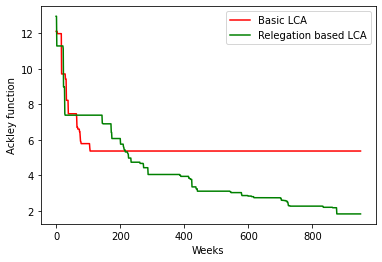

In [ ]:
if __name__ == "__main__":
    print("Select test function.")
    print("0: Sphere")
    print("1: Rosenbrock")
    print("2: Rastrigin")
    print("3: Ackley")
    choice = int(input("Enter the number corresponding to test function: ")) #choice denotes test function
    print("\n")
    LCA = LeagueChampionshipAlgorithm() #LCA is an object of LeagueChampionshipAlgorithm class
    rel = 0 #rel denotes a binary variable denoting whether relegation is performed or not
    print("~~~~ Output result ~~~~")
    print("\n")
    print("Basic LCA")
    y = LCA.league(choice, rel) #Basic LCA
    print("\n")
    print("Relegation based LCA")
    rel = 1
    z = LCA.league(choice, rel) #Relegation based LCA
    x = list(t for t in range(S * (L - 1)+1))

    plt.plot(x, y, color = 'r')
    plt.plot(x, z, color = 'g')
    plt.xlabel("Weeks")
    plt.ylabel("Ackley function")
    plt.legend(["Basic LCA","Relegation based LCA"])
    plt.savefig('temp.png')
